# Game Of Thrones Text Generation

## Importing Libraries and Text Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.layers import LSTM, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

sns.set_style('darkgrid')
%matplotlib inline

In [3]:
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [4]:
# load document
in_filename = 'GOT1.txt'
doc = load_doc(in_filename)

In [5]:
doc[:1000]

'A Game Of Thrones \nBook One of A Song of Ice and Fire \nBy George R. R. Martin \nPROLOGUE \n"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are \ndead." \n"Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile. \nGared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. \n"Dead is dead," he said. "We have no business with the dead." \n"Are they dead?" Royce asked softly. "What proof have we?" \n"Will saw them," Gared said. "If he says they are dead, that\'s proof enough for me." \nWill had known they would drag him into the quarrel sooner or later. He wished it had been later rather \nthan sooner. "My mother told me that dead men sing no songs," he put in. \n"My wet nurse said the same thing, Will," Royce replied. "Never believe anything you hear at a woman\'s \ntit. There are things to be learned even from the dead." His voice echoed, too loud in the twilit fores

## EDA and Text Preprocessing

In [6]:
print(type(doc))
print(len(doc.split()))

<class 'str'>
296183


In [7]:
doc_sample = doc[:1000]

In [8]:
doc_sample

'A Game Of Thrones \nBook One of A Song of Ice and Fire \nBy George R. R. Martin \nPROLOGUE \n"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are \ndead." \n"Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile. \nGared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. \n"Dead is dead," he said. "We have no business with the dead." \n"Are they dead?" Royce asked softly. "What proof have we?" \n"Will saw them," Gared said. "If he says they are dead, that\'s proof enough for me." \nWill had known they would drag him into the quarrel sooner or later. He wished it had been later rather \nthan sooner. "My mother told me that dead men sing no songs," he put in. \n"My wet nurse said the same thing, Will," Royce replied. "Never believe anything you hear at a woman\'s \ntit. There are things to be learned even from the dead." His voice echoed, too loud in the twilit fores

In [9]:
def clean_text(corpus):
    corpus = corpus.lower() #lowercase
    corpus = re.sub(r"[^\w|\d*]", " ", corpus) # remove punctuations
    corpus = re.sub(r"page\s\d", "", corpus)
    corpus = re.sub(r"\s{3}|\s{2}", " ", corpus) # remove triple/double spaces
    return corpus

In [10]:
clean_corpus = clean_text(doc)

In [11]:
clean_corpus[:1000]

'a game of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead  do the dead frighten you ser waymar royce asked with just the hint of a smile gared did not rise to the bait he was an old man past fifty and he had seen the lordlings come and go  dead is dead he said we have no business with the dead  are they dead royce asked softly what proof have we  will saw them gared said if he says they are dead that s proof enough for me  will had known they would drag him into the quarrel sooner or later he wished it had been later rather than sooner my mother told me that dead men sing no songs he put in  my wet nurse said the same thing will royce replied never believe anything you hear at a woman s tit there are things to be learned even from the dead his voice echoed too loud in the twilit forest  we have a long ride before us gared pointed out eight days maybe nine and ni

In [12]:
len(clean_corpus)

1523673

<BarContainer object of 2 artists>

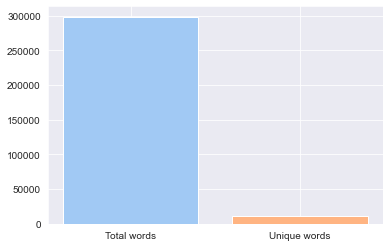

In [13]:
plt.bar(x = ["Total words", "Unique words"], 
        height=[len(clean_corpus.split()), len(set(clean_corpus.split()))], 
        color=sns.color_palette('pastel'))

## Creating input and output sequences

In [14]:
sequences_doc = []
seq_len = 50
l = seq_len + 1
tokens = clean_corpus.split()

for i in range(l, len(tokens)):
    
    seq = tokens[i-l:i]

    line = ' '.join(seq)
    sequences_doc.append(line)

In [15]:
sequences_doc[2]

'of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead do the dead frighten you ser waymar royce asked with just the hint of a'

## Model Training

In [16]:
# should take under 20 seconds
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sequences_doc)
sequences = tokenizer.texts_to_sequences(sequences_doc)

vocab_size = len(tokenizer.word_index) + 1

In [17]:
vocab_size

11471

In [18]:
sequences[0][:10]

[4, 1103, 5, 1781, 1309, 49, 5, 4, 1031, 5]

In [19]:
type(sequences[0])

list

In [20]:
sequences = pad_sequences(sequences=sequences)

In [21]:
sequences = np.array(sequences)

In [22]:
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)

seq_length = X.shape[1]

In [23]:
def define_model(vocab_size, seq_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 50, input_length=seq_length))
    model.add(LSTM(100, return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(vocab_size, activation='softmax'))
    
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    return model

In [24]:
model = define_model(vocab_size, 50)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            573550    
_________________________________________________________________
lstm (LSTM)                  (None, 50, 100)           60400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 11471)             1158571   
Total params: 1,883,021
Trainable params: 1,883,021
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X, y, epochs=10, batch_size=1024)

Epoch 1/10
292/292 [==============================] - 321s 1s/step - loss: 6.8524 - accuracy: 0.0574
Epoch 2/10
292/292 [==============================] - 303s 1s/step - loss: 6.4599 - accuracy: 0.0603
Epoch 3/10
292/292 [==============================] - 319s 1s/step - loss: 6.2497 - accuracy: 0.0693
Epoch 4/10
292/292 [==============================] - 311s 1s/step - loss: 6.0362 - accuracy: 0.0803
Epoch 5/10
251/292 [========================>.....] - ETA: 42s - loss: 5.8720 - accuracy: 0.0915

KeyboardInterrupt: 

## Prepare the model

In [26]:
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
    # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # predict probabilities for each word
        yhat = model.predict(encoded, verbose=0)
        yhat = np.argmax(yhat,axis=1)
        print(yhat)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

In [27]:
seed_text = sequences_doc[np.random.randint(0,len(sequences_doc))]
print(seed_text + '\n')
generate_seq(model, tokenizer, seq_length, seed_text, 50)

if you had not pointed it out from his vantage point atop the throne he could see men slipping out the door at the far end of the hall hares going to ground he supposed or rats off to nibble the queen s cheese he caught a glimpse of septa mordane

[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]
[54]
[8]
[1]


'was the king was the king was the king was the king was the king was the king was the king was the king was the king was the king was the king was the king was the king was the king was the king was the king was the'

In [ ]:
seed_text = sequences_doc[np.random.randint(0,len(sequences_doc))]
print(seed_text + '\n')
generate_seq(model, tokenizer, seq_length, seed_text, 50)[:60]

In [ ]:
pd.read_csv("twitter_parsed_dataset.csv")["Text"][np.random.randint(0, len(pd.read_csv("twitter_parsed_dataset.csv")))]

In [ ]:
seed_text = sequences_doc[np.random.randint(0,len(sequences_doc))]
print(seed_text + '\n')
generate_seq(model, tokenizer, seq_length, seed_text, 50)[:60]